# Módulo 01 - Python e pandas para análise de dados reais

## Aula 02.Primeiras visualizações de gráficos

AS informações de onde conseguimos a base de dados para o trabalho estão no arquivo txt dentro do GitHub e do Notion [nesse link](https://www.notion.so/02-Primeiras-visualiza-es-de-dados-01-Entendendo-gr-ficos-612fd521bb814ec3a32be6ac102152dc)


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv")

Se tentarmos abrir o arquivo assim, aparecerá um erro utf-8, que é muito comum quando vamos abrir arquivos do governo. Esse erro está associado à forma de abrir um arquivo.

Uma analogia é que o á é lido em português de uma forma, mas em outras línguas é lido de outra forma. Para isso, nós precisamos definir uma regra para o Python ler o arquivo. Para isso, precisamos definir um parâmetro dentro da nossa função que é encoding = "ISO-8859-1"

In [3]:
#dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv", encoding="ISO-8859-1")

Agora se formos rodar esse arquivo, ele resultará o erro "Error Tokenising Data". Nesse caso, precisamos informar que é necessário pular as três primeiras linhas (porque não são relevantes) e também informar que o separador é o ";" e não p ","

In [4]:
dados = pd.read_csv("https://github.com/nicolas-stelatto/bootcamp_data_science_aplicada/raw/main/Modulo_2/Dados/Valor%20total%20por%20Ano_m%C3%AAs%20atendimento%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o.csv", encoding="ISO-8859-1", skiprows=3, sep=";", engine="python")
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8457455,71","7766983,20","8858845,57","8407076,44","9492938,92","8206195,92","9011612,58","9124967,84","8406732,72","8411360,02","8651081,66","8193425,99","8388269,45","8645315,78","9050329,13","9211262,51","9490545,02","8600886,20","8919190,86","8909111,89","8409386,09","8924348,41","8948605,66","8660753,05","8327665,97","8431334,62","7251287,20","7490440,60","8957706,45","10993332,84","10479989,36","11433467,56","8876900,39","8167253,19","8759013,71","9003402,23","8414690,60","6039419,59","4732441,04","996411254,68"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2968168,75","2769797,39","3057631,96","2874965,31","3175575,17","3060903,21","3253011,61","3040645,05","2926179,27","3126120,64","2473454,85","2277493,49","2594347,32","2234388,36","2473008,49","2979764,77","3070533,95","3249052,69","3567538,64","2981072,98","2998860,31","3293378,97","3174249,43","2959569,09","3276790,55","2985763,71","2939675,20","2672857,33","2940827,86","3914823,86","4053085,41","3658265,59","3470409,45","3267918,69","3393958,27","3711660,71","3005561,16","2272733,90","1137341,65","450048530,47"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14549450,86","12753555,36","14749409,47","14577930,81","15381061,96","14653650,77","15544595,79","16374961,41","15343340,93","16249963,61","14255408,82","14274053,94","15358914,00","14100074,56","16103971,89","16154491,82","16529976,06","15509984,83","16642220,71","16493719,52","15351607,47","16339427,95","14821977,50","14965815,90","15982353,42","15166470,82","14815958,58","16379386,07","19625325,21","18433057,47","19303743,16","18687233,58","18628627,49","18728251,20","20451573,77","21546059,48","24439059,57","13679358,06","6799060,80","1917247936,05"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2740952,07","2478349,44","2674958,94","2721261,19","2844811,66","2967161,35","2841587,97","3328230,63","2878691,04","2964324,32","2524712,40","2462451,64","2662240,18","2499996,16","2846135,56","2789823,29","2839389,53","2647540,20","2865777,71","3181321,82","3070436,96","3162342,44","3121104,71","2889969,87","3084561,08","2967159,04","2813954,05","2306119,95","2921522,16","3300012,98","3192075,41","3262354,34","2978629,22","3313296,78","3527263,23","3125021,90","3209323,68","3044798,77","2381844,31","328876965,09"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33615836,09","30623491,62","34121931,00","35039954,20","35424611,06","34160283,18","34484949,49","35618364,04","34380916,90","38441090,50","33583538,08","32789354,87","34513534,80","31885919,67","33236155,79","31008924,95","31064106,50","28543179,30","36713929,36","36462011,47","36792954,02","36984314,60","35579251,49","35247659,30","37046350,76","34683341,17","34908420,50","29184688,30","43327731,71","40994545,21","40496349,97","38793393,54","36965951,76","38406616,21","37043032,10","36914437,92","33887773,65","23343222,94","13069564,31","4705309002,29"


No arquivo, ainda tem algumas linhas no final que não são relevantes para a nossa análise. O que precisamos fazer é excluir as doze últimas linhas

In [5]:
dados = pd.read_csv("https://github.com/nicolas-stelatto/bootcamp_data_science_aplicada/raw/main/Modulo_2/Dados/Valor%20total%20por%20Ano_m%C3%AAs%20atendimento%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, engine="python")
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8457455,71","7766983,20","8858845,57","8407076,44","9492938,92","8206195,92","9011612,58","9124967,84","8406732,72","8411360,02","8651081,66","8193425,99","8388269,45","8645315,78","9050329,13","9211262,51","9490545,02","8600886,20","8919190,86","8909111,89","8409386,09","8924348,41","8948605,66","8660753,05","8327665,97","8431334,62","7251287,20","7490440,60","8957706,45","10993332,84","10479989,36","11433467,56","8876900,39","8167253,19","8759013,71","9003402,23","8414690,60","6039419,59","4732441,04","996411254,68"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2968168,75","2769797,39","3057631,96","2874965,31","3175575,17","3060903,21","3253011,61","3040645,05","2926179,27","3126120,64","2473454,85","2277493,49","2594347,32","2234388,36","2473008,49","2979764,77","3070533,95","3249052,69","3567538,64","2981072,98","2998860,31","3293378,97","3174249,43","2959569,09","3276790,55","2985763,71","2939675,20","2672857,33","2940827,86","3914823,86","4053085,41","3658265,59","3470409,45","3267918,69","3393958,27","3711660,71","3005561,16","2272733,90","1137341,65","450048530,47"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14549450,86","12753555,36","14749409,47","14577930,81","15381061,96","14653650,77","15544595,79","16374961,41","15343340,93","16249963,61","14255408,82","14274053,94","15358914,00","14100074,56","16103971,89","16154491,82","16529976,06","15509984,83","16642220,71","16493719,52","15351607,47","16339427,95","14821977,50","14965815,90","15982353,42","15166470,82","14815958,58","16379386,07","19625325,21","18433057,47","19303743,16","18687233,58","18628627,49","18728251,20","20451573,77","21546059,48","24439059,57","13679358,06","6799060,80","1917247936,05"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2740952,07","2478349,44","2674958,94","2721261,19","2844811,66","2967161,35","2841587,97","3328230,63","2878691,04","2964324,32","2524712,40","2462451,64","2662240,18","2499996,16","2846135,56","2789823,29","2839389,53","2647540,20","2865777,71","3181321,82","3070436,96","3162342,44","3121104,71","2889969,87","3084561,08","2967159,04","2813954,05","2306119,95","2921522,16","3300012,98","3192075,41","3262354,34","2978629,22","3313296,78","3527263,23","3125021,90","3209323,68","3044798,77","2381844,31","328876965,09"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33615836,09","30623491,62","34121931,00","35039954,20","35424611,06","34160283,18","34484949,49","35618364,04","34380916,90","38441090,50","33583538,08","32789354,87","34513534,80","31885919,67","33236155,79","31008924,95","31064106,50","28543179,30","36713929,36","36462011,47","36792954,02","36984314,60","35579251,49","35247659,30","37046350,76","34683341,17","34908420,50","29184688,30","43327731,71","40994545,21","40496349,97","38793393,54","36965951,76","38406616,21","37043032,10","36914437,92","33887773,65","23343222,94","13069564,31","4705309002,29"


In [6]:
dados.mean()

Series([], dtype: float64)

Vendo essa mensagem de erro, nós vemos que na verdade os valores são textos (Strings), e não números, porque, na língua portuguesa, nós identificamos separador de decimais com "," e o python por padrão utiliza ".". Dessa forma, o python entende que o valor é uma String, e não um número.

Para ajustar esse problema, precisamos informar no read csv outras informações - adicionar outros parâmetros

In [7]:
dados = pd.read_csv("https://github.com/nicolas-stelatto/bootcamp_data_science_aplicada/raw/main/Modulo_2/Dados/Valor%20total%20por%20Ano_m%C3%AAs%20atendimento%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine="python")
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [8]:
dados.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Dez    5.377291e+07
2021/Jan    4.947411e+07
2021/Fev    3.899242e+07
2021/Mar    2.416371e+07
Total       6.388206e+09
Length: 165, dtype: float64

Não conseguimos analisar bem essas informações porque os dados estão em notação científica (forma de impressão está como notação científica). Para resolver o problema, basta alterar de forma global essa forma de impressão

In [9]:
pd.options.display.float_format = "{:.2f}".format

In [10]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

Como podemos fazer para selecionar os valores da coluna 2008/jan?

Retomando o questionamento do vídeo anterior: Como podemos fazer para selecionar os valores da coluna 2008/jan?

In [11]:
dados["2008/Jan"]

0       1829559.71
1       1731744.62
2      11419210.08
3        808448.39
4      21762104.16
5       1329876.61
6       5136474.61
7      21551600.33
8      11375419.37
9      32444328.54
10     11763899.23
11     16599004.84
12     51261210.58
13     16568724.64
14      5439985.99
15     73947845.87
16    206208080.90
17     16212109.41
18    251511992.03
19   1038067423.15
20     58081334.45
21     53034384.67
22     51064610.03
23      8301006.10
24      8213438.64
25     75039013.46
26     10561085.46
Name: 2008/Jan, dtype: float64

Esses valores que aparecem de uma coluna apenas são chamados de SÉRIES. A forma de chamar uma coluna é a mesma forma de chamar o Value de um Dictionary (chamando o Key do Dictionary)

In [12]:
dados["2008/Ago"].mean()

26641365.101481482

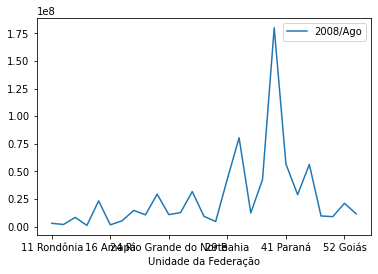

In [13]:
dados.plot(x="Unidade da Federação", y="2008/Ago")

Esse gráfico não está muito visível, porque as legendas não estão muito boas e, principalmente, porque, pelo tipo de dados que estamos lendo, o gráfico de linhas é ruim para visualização. É melhor plotar o gráfico de barras.

Para plotar o gráfico de barras podemos fazer da forma que está abaixo ou podemos fazer:
dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar")

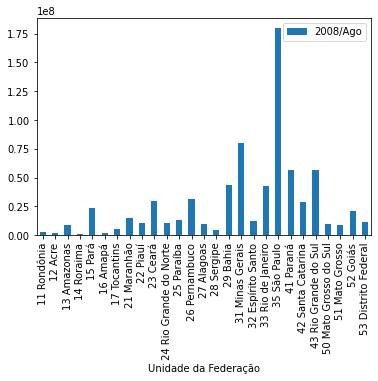

In [14]:
dados.plot.bar(x="Unidade da Federação", y="2008/Ago")

Nesse gráfico, podemos aumentar o tamanho da figura. Usamos o parâmatro Figsize para aumentar o tamanho colocando uma tupla de valores

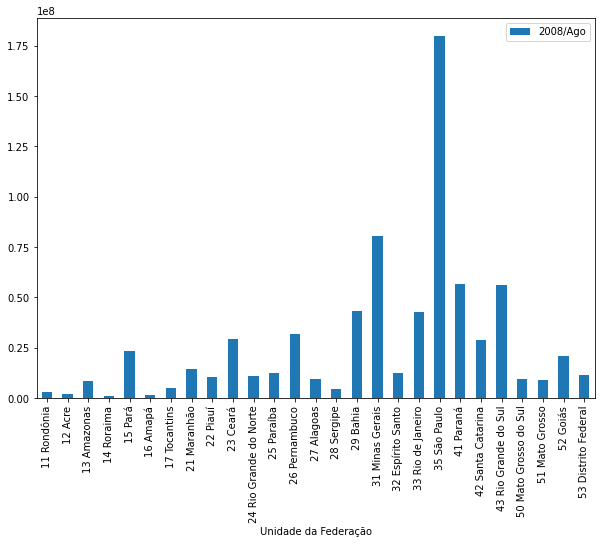

In [15]:
dados.plot.bar(x="Unidade da Federação", y="2008/Ago", figsize=(10, 7))

Para arrumar esse problema, precisamos primeiramente usar a biblioteca matplotlib.pyplot usando a função import e importar a biblioteca matplotlib.ticker.FormatStrFormatter

#### Desafio 01: escolher um título mais descritivo, que passe a mensagem adequada.
obs: pensar no que você vai falar no gráfico. Porque se pensar "Valor por unidade da federação" não é um título que passa nenhuma mensagem, não agrega em nada. Na verdade era só ter lido os eixos que você já chegaria na conclusão do título

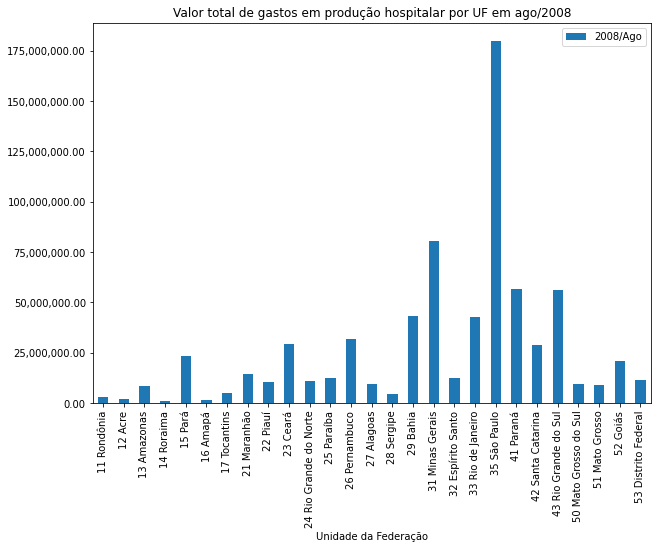

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot.bar(x="Unidade da Federação", y="2008/Ago", figsize=(10, 7))
#esse AX também é a mesma coisa que AXIS, que são os controles dos eixos X e eixos Y de um gráfico

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#buscar na documentação essa função e colocar o "," para separação de milhares e "." para separação de decimais com duas casas

plt.title("Valor total de gastos em produção hospitalar por UF em ago/2008")
#função para colocar o título em um gráfico

plt.show()
#método para excluir algumas informações de detalhes que apareceria antes do gráfico

No caso do título, precisaríamos informar quais são os valores que estão sendo exibiso (valor total de gastos em produção hospitalar) separado por UF da série histórica de agosto de 2008

#### Desafio 02: Faça a mesma análise para o mês mais recente

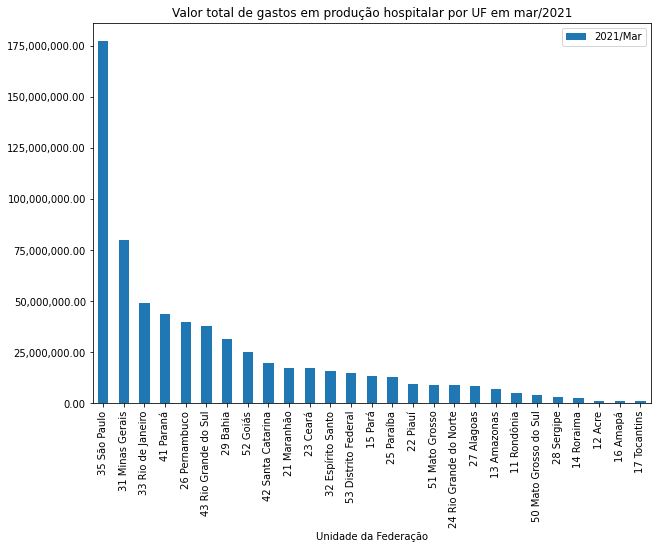

In [17]:
ax = dados.sort_values(by="2021/Mar", ascending = False).plot.bar(x="Unidade da Federação", y="2021/Mar", figsize=(10, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor total de gastos em produção hospitalar por UF em mar/2021")
plt.show()

### Módulo 01 Entendendo gráficos

In [18]:
#dados["2008/Ago", "2008/Set"]
# se você tentar rodar esse código não vai funcionar, porque funciona como um dicionário, 
# ele procura uma coluna que possui esse valor "2008/Ago", "2008/Set" e como não existe dá um KeyError
# como nós queremos duas colunas precisamos criar uma lista com dois elementos

In [19]:
dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


Agora nós queremos comparar dois meses por estado ou algo do gênero. Mas, para isso, precisamos pegar um mês que todos os estados possuem valores. A forma abaixo é uma de fazer isso.

obs: uma outra forma de tratar esses valores vazios é dropar esses valores, preencher eles com algum outro valor etc

In [20]:
dados.mean()
# traz somente a média de um mês que tem todos os estados com um valor, por isso, não mostra valores de 1992

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

No caso das informações acima, estamos interessados apenas nos valores da esquerda (também chamados de Index) para fazermos nossa análise. Dessa forma, podemos selecionar os valores dos index da seguinte forma)

In [21]:
#colunas_usaveis = dados.mean().index
# feito essa seleção das colunas nós ainda queremos inserir uma coluna no início dos dados que mostra as unidades da federação. Para isso podemos fazer o seguinte:

#colunas_usaveis.insert(0, "Unidade da Federação")
# se tentarmos inserir dessa forma não irá funcionar, porque o resultado do .index é uma série não mutável (não é uma lista). Para funcionar, precisamos transformar em uma lista

colunas_usaveis = dados.mean().index.to_list()
colunas_usaveis.insert(0, "Unidade da Federação")

Agora vamos fazer um slice na nossa tabela só dos meses que temos todos os dados de estados com valores preenchidos

In [22]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,24999

Aqui percebemos que o nosso index está como 0, 1, 2, 3 ... mas na verdade isso não é útil nem prático, porque o nosso index é a Unidade da Federação. Para isso, podemos setar como index esses valores

In [23]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [24]:
usaveis["2009/Ago"].head()
# traz a coluna de 2009 ago

Unidade da Federação
11 Rondônia    3787323.26
12 Acre        1714707.91
13 Amazonas    9267006.58
14 Roraima     1529696.18
15 Pará       27892582.69
Name: 2009/Ago, dtype: float64

In [25]:
usaveis.loc["12 Acre"]
# essa função Loc localiza a linha cujo indice é 12 Acre

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Dez     3711660.71
2021/Jan     3005561.16
2021/Fev     2272733.90
2021/Mar     1137341.65
Total      450048530.47
Name: 12 Acre, Length: 165, dtype: float64

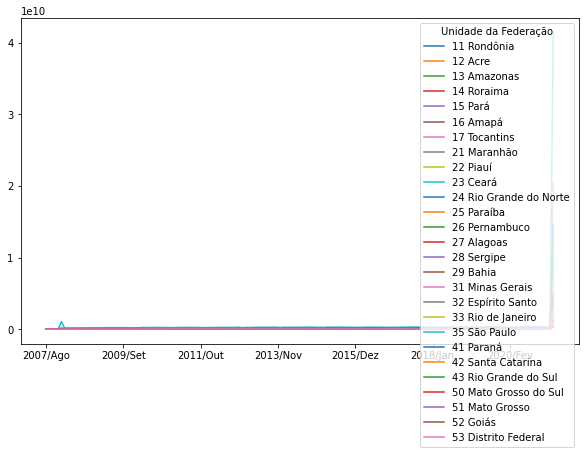

In [26]:
#usaveis.head()
# se observamos a nossa tabela nós podemos ver que as linhas são os estados e as colunas são as datas, nós podemos transpor essa tabela usando a função .T e plotar um gráfico

usaveis.T.plot(figsize=(10, 6))

Esse gráfico está inelegível porque existe uma coluna no final do gráfico que é muito maior do que qualquer outra coluna. Usando a função .tail no nosso df podemos descobrir qual é esse valor

In [27]:
usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Dez,9003402.23,3711660.71,21546059.48,3125021.90,36914437.92,2826612.42,689383.43,30927070.93,19352220.14,50271552.33,27277816.41,20355212.85,77877186.72,17462663.52,10997949.03,83131785.74,166376967.67,40500910.57,90567351.87,326846228.95,122146256.92,72720675.11,116833971.73,21387005.58,18852854.81,37614253.55,22552034.04
2021/Jan,8414690.60,3005561.16,24439059.57,3209323.68,33887773.65,2513766.36,347626.85,26797697.76,18437275.64,43743425.74,23228004.80,20149018.68,76810042.34,16496784.27,7149727.62,70325599.07,155064483.25,33767261.13,87201907.99,324115425.70,106948897.53,57281832.19,102317646.36,16027788.65,15890528.31,35655886.73,22573869.50
2021/Fev,6039419.59,2272733.90,13679358.06,3044798.77,23343222.94,1534733.18,416534.32,23260245.95,13636005.36,30186951.00,18186942.80,16996494.03,62259409.32,12792571.64,4129845.36,55544579.04,119877417.15,25669612.63,60873103.08,268193064.06,83130175.37,47429335.91,84404640.00,11428462.42,13207979.82,32253788.65,19004029.87
2021/Mar,4732441.04,1137341.65,6799060.80,2381844.31,13069564.31,989155.40,928756.84,17294509.11,9542151.53,17173151.55,8733455.36,12517894.05,39472738.81,8180887.21,3081081.42,31314602.44,79780838.00,15606368.11,49149884.48,177408317.71,43480729.07,19375822.56,37798832.80,4035989.77,8835890.09,24867001.02,14731938.43
Total,996411254.68,450048530.47,1917247936.05,328876965.09,4705309002.29,309860092.59,1020028272.64,3871069498.04,2280888802.74,6591836650.18,2660122027.15,2614919044.63,8581189975.91,2236415402.51,1215853015.00,9791541570.52,20418737536.66,3405850698.58,10337389922.09,41396408548.81,14681514706.67,7835011163.40,12764391179.92,2324525096.33,2180119781.15,4973572261.43,2592422853.56


Esse valor que está lá é o valor do total. Para podermos criar um gráfico mais adequado precisamos remover esse total

In [28]:
usaveis = usaveis.drop("Total", axis=1)
# axis 0 é o eixo da Coluna e axis 1 é o eixo da linha, como Total está na linha colocamos 1

usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

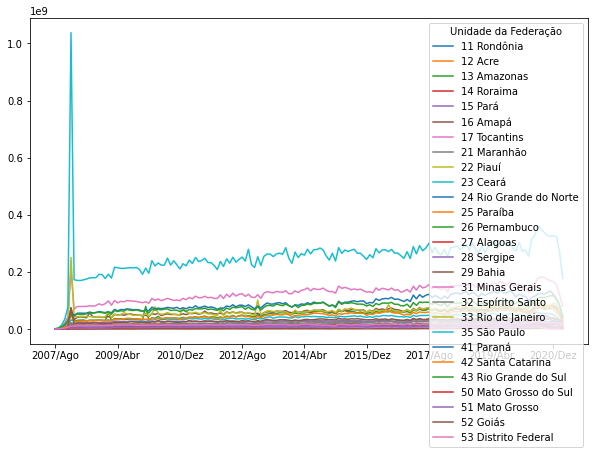

In [29]:
usaveis.T.plot(figsize=(10, 6))

### Desafio 01: Reposicionar a legenda. Dentro? Fora? Onde?

Nesse gráfico, além do tamanho ruim e que a legenda está no meio dos valores, eu acho difícil de descobrir o segundo maior valor (é do Tocantins?, é do Distrito Federal?)

Para melhorar a visualização do gráfico, além de ajustar o tamanho da figura e melhorar o posicionamento da legenda, eu pensei em ajustar a ordem das legendas para ser do maior para menor (tomando como base os últimos valores - Mar de 2021)

In [30]:
usaveis["2021/Mar"].sort_values(ascending=False)

Unidade da Federação
35 São Paulo             177408317.71
31 Minas Gerais           79780838.00
33 Rio de Janeiro         49149884.48
41 Paraná                 43480729.07
26 Pernambuco             39472738.81
43 Rio Grande do Sul      37798832.80
29 Bahia                  31314602.44
52 Goiás                  24867001.02
42 Santa Catarina         19375822.56
21 Maranhão               17294509.11
23 Ceará                  17173151.55
32 Espírito Santo         15606368.11
53 Distrito Federal       14731938.43
15 Pará                   13069564.31
25 Paraíba                12517894.05
22 Piauí                   9542151.53
51 Mato Grosso             8835890.09
24 Rio Grande do Norte     8733455.36
27 Alagoas                 8180887.21
13 Amazonas                6799060.80
11 Rondônia                4732441.04
50 Mato Grosso do Sul      4035989.77
28 Sergipe                 3081081.42
14 Roraima                 2381844.31
12 Acre                    1137341.65
16 Amapá                    9

In [31]:
legenda_maior_menor = usaveis["2021/Mar"].sort_values(ascending=False).index.to_list()
# para isso, eu selecionei a última coluna, ordenei do maior para o menor, peguei somente os índices, transformei em uma lista e chamei de legenda_maior_menor

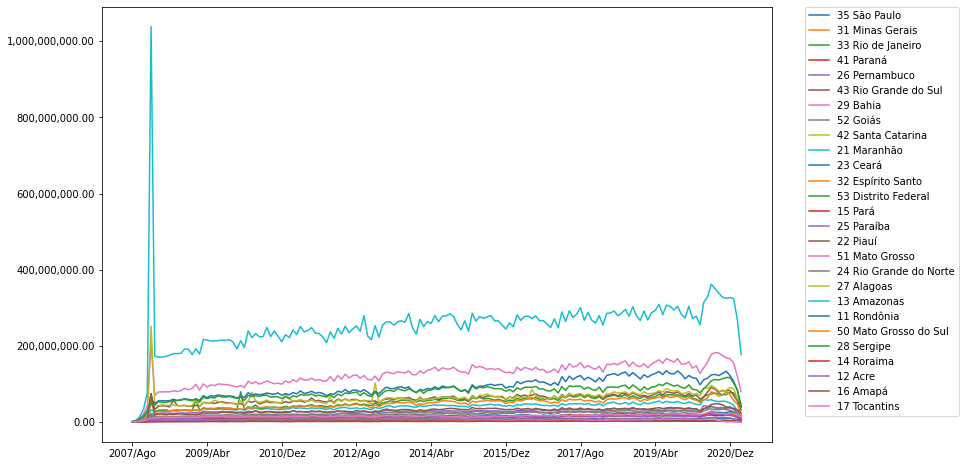

In [32]:
ax2 = usaveis.T.plot(figsize=(12, 8))
#tive que aumentar o tamanho da figura para ficar do tamanho da legenda de mais fácil visualização
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#função que já aprendemos previamente no Notebook e já utilizamos
plt.legend(legenda_maior_menor, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#vi essa forma de ajustar o gráfico na documentação em Legend Guide do Matplotlib no link https://matplotlib.org/1.3.1/users/legend_guide.html e coloque o label como a lista que acabei de criar que ordena a legenda

### Desafio 02: Selecionar cinco estados para plotar apenas cinco estados

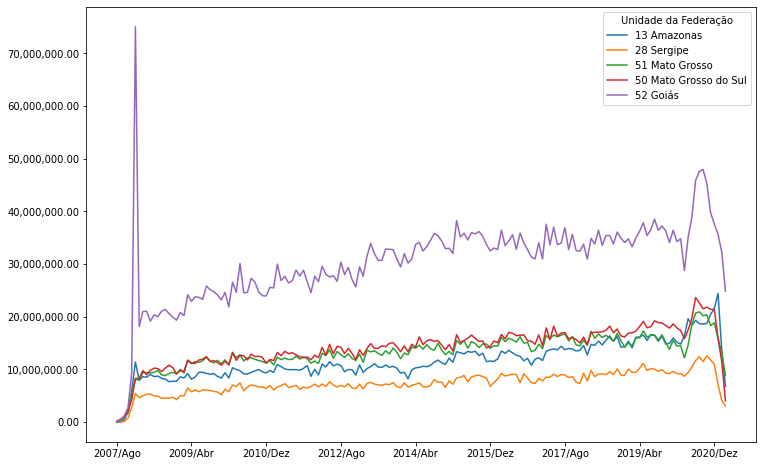

In [33]:
ax3 = usaveis.loc[["13 Amazonas", "28 Sergipe", "51 Mato Grosso", "50 Mato Grosso do Sul", "52 Goiás"]].T.plot(figsize=(12, 8))
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

Quando for criar expressões muito grandes é importante prestar atenção na ordem, porque se colocar na ordem errada vai dar problema (ex: se eu colocasse o ".T" antes do loc, ele ia procurar uma linha que possui "13 Amazonas" mas na verdade o "13 amazonas" já estava na coluna.

Outra questão que altera a ordem são os tipos dos dados também (olhar tabela abaixo) o plot é um método a ser aplicado para um dataframe, se você tentar aplicar para um index não vai dar certo

Caso no gráfico acima quiséssemos aplicar o método .sort_values() poderíamos seguir a ordem df.sort_values().plot() -> precisamos seguir essa ordem porque o .sort_values() é um método para ser aplicado em um DataFrame e retorna um outro Data Frame. O plot deve ser aplicado em um Data Frame mas retorna um gráfico. Dessa forma, não é possível aplicar o .sort_values() em um gráfico, por isso seguimos essa ordem anterior

In [34]:
#type(usaveis)
# retorna: pandas.core.frame.DataFrame -> é um dataframe

#type(usaveis.loc[["13 Amazonas", "28 Sergipe", "51 Mato Grosso", "50 Mato Grosso do Sul", "52 Goiás"]])
# retorna: pandas.core.frame.DataFrame -> continua sendo um um dataframe

#type(usaveis.loc[["13 Amazonas", "28 Sergipe", "51 Mato Grosso", "50 Mato Grosso do Sul", "52 Goiás"]].T)
# retorna: pandas.core.frame.DataFrame -> continua sendo um um dataframe

#type(usaveis.index)
# retorna: pandas.core.indexes.base.Index -> é uma series

#type(usaveis.plot)
# retorna: pandas.plotting._core.PlotAccessor

## Aula 03.Manipulação de dados

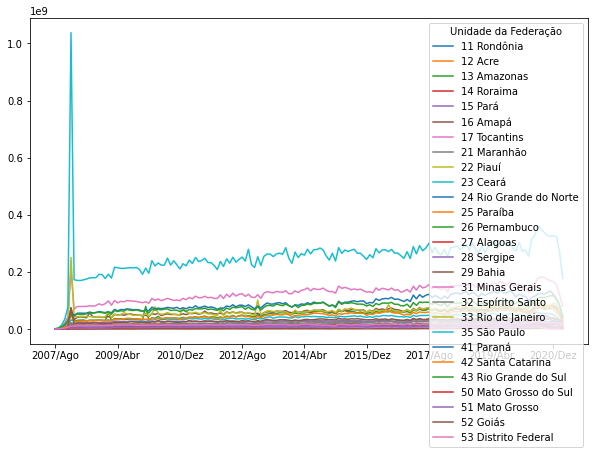

In [35]:
usaveis.T.plot(figsize=(10, 6))

Gerando novamente esse gráfico, podemos perceber que a legibilidade desse gráfico é muito ruim, não tem como analisar algumas informações
ex: a cor do Ceará e a cor de São Paulo são as mesmas.

### Desafio 01: Escolher uma pelete de cores com o Matplotlib 
(provavelmente precise de 27 cores)

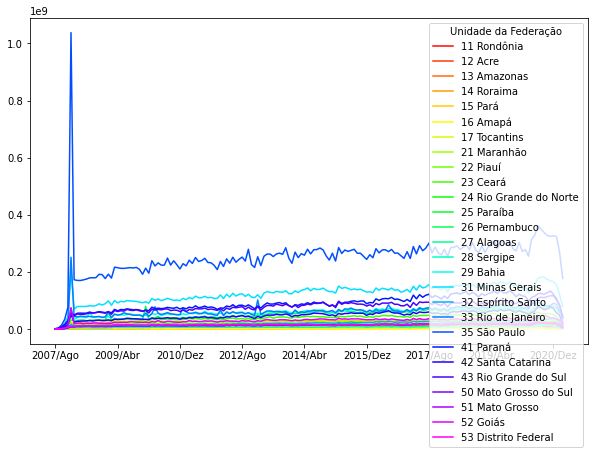

In [36]:
sns.set_palette(sns.color_palette("gist_rainbow", 27))

usaveis.T.plot(figsize=(10, 6))

### Modulo 01 Aleatoriedade e mais explorações

Outro problema do código é que não dá para entender nada das linhas mais próximas ao eixo X, porque estão todas umas coladas nas outras. Provavelmente, plotar 27 linhas não é a forma mais adequada de transmitir a informação que queremos passar.

Ao invés de plotar 27 estados, nós podemos escolher cinco estados. Podemos escolher cinco aleatórios, podemos escolher os cinco que mais gastaram e várias outras formas. Vamos selecionar os cinco primeiros dados (coincidentemente são os 5 estados da região Norte)

In [37]:
usaveis.T.columns[:5]
# retorna uma Array do Numpy que tem diversas opções de slices, como o slice que fizemos acima selecionando os 5 primeiros estados

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

Podemos fazer o slice na planilha que contem as linhas e plotar o gráfico

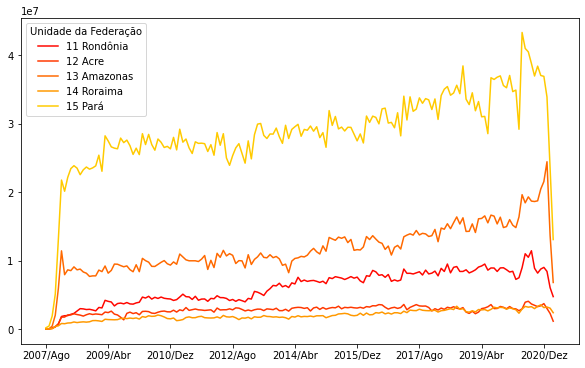

In [38]:
usaveis[:5].T.plot(figsize=(10, 6))

Podemos também escolher 7 estados aleatórios

In [39]:
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,75039013.46,18149374.27,20992213.03,21049477.30,19162546.79,20362996.88,20022472.33,21054991.27,21410602.15,20610541.50,19940725.98,19343787.54,20817880.66,20215479.18,24174119.21,22943952.73,23781906.69,23683787.01,23293723.39,25835544.14,25151192.72,24757922.75,24104438.24,23202137.78,24629519.95,21862807.98,26568038.94,24607122.59,30114745.26,24546627.05,24647099.10,27313107.94,26571169.39,24729254.00,24006963.52,...,32418887.65,33774725.23,30951957.24,34889685.12,33793945.19,36429187.65,33535245.30,35400045.71,35408697.61,33813397.64,36064816.74,34904539.36,34092381.28,34795831.02,33292972.66,34964737.78,36236325.32,37829806.86,35400944.86,36502552.32,38533573.53,36415308.03,37217715.53,36302392.68,34078918.26,36432399.98,34248522.76,34808037.62,28760754.83,35104476.04,38888207.13,45871329.20,47568155.41,47951326.80,45304843.74,39785408.90,37614253.55,35655886.73,32253788.65,24867001.02
28 Sergipe,27453.63,78565.19,122952.94,775705.52,2765495.63,5439985.99,4636850.76,5017838.07,5265951.03,5367094.94,4981036.36,4928822.87,4543252.50,4525676.82,4566052.38,4716241.96,4272627.88,5037054.40,4983217.59,6504862.57,5772732.46,6111674.22,5789895.43,6122676.14,6105674.90,6019912.61,5852499.57,5722988.22,5201100.49,6261031.57,5754032.25,7057311.82,6758264.65,7452360.44,5958403.64,6660243.30,7061516.92,6924628.71,6663604.22,6691150.75,...,7350893.95,9313556.40,7817772.09,9831536.21,8649405.83,9127323.57,9141588.81,9026038.83,9572164.12,9027721.47,10099292.36,8939051.71,8885595.93,10057876.32,9465338.97,9455876.39,10229651.99,11156849.60,9818775.39,10144599.12,10075280.52,9641013.11,9980401.55,9282433.76,9240681.24,9626956.33,9186554.56,9226713.03,8721205.93,9419572.73,10458350.95,11700344.16,12434101.29,11488626.57,12571979.79,11816872.93,10997949.03,7149727.62,4129845.36,3081081.42
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965

sample() é um método para ALEATORIEDADE. Você seleciona quantos números você quer com o parâmetro n e o método gera uma amostra aleatória. Ele gera números aleatórios a partir de cada seed que você coloca. Como toda vez que você gera um sample ele usa um seed diferente o resultado sempre é diferente.

Caso você queira gerar um valor aleatório previsível, você precisa setar o seed, que é a semente da aleatoriedade

In [40]:
#import numpy as np

np.random.seed(687942)

usaveis.sample(n=7)
#sempre que você rodar esse código ele sempre vai gerar um resultado igual

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25983304.03,28690916.87,25936888.97,28550512.79,29318260.49,27519132.91,29788885.15,26294165.36,25250918.87,27615604.26,26601451.82,26689904.87,24003052.09,29290756.45,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10260681.64,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22634327.48,19926336.21,22290820.67,20445273.59,19382682.35,21161380.30,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137456.57,23073542.40,23438983.02,23086206.33,20354752.02,20140235.98,22205064.78,20518138.12,20939897.73,17722069.48,20430287.05,23027750.86,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,23228004.80,18186942.80,8733455.36
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6

### Desafio 02: Adicionar uma coluna mostrando a região de cada estado

In [41]:
index_list = usaveis.index.to_list()

regiao = []
for estado in index_list:
  if estado[0] == "1":
    regiao.append("Norte")
  elif estado[0] == "2":
    regiao.append("Nordeste")
  elif estado[0] == "3":
    regiao.append("Sudeste")
  elif estado[0] == "4":
    regiao.append("Sul")
  elif estado[0] == "5":
    regiao.append("Centro-Oeste")

Criei uma lista com o index do Data Frame. Se observamos o index, podemos ver que os estados da região Norte sempre começam com o número 1 e os estados da região Nordeste com o número 2 e por aí vai.

Dessa forma eu iterei sobre essa lista e criei uma nova que dependendo do primeiro elemento ele cria a string da região adequada

In [42]:
usaveis["Regiao"] = regiao
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,2674958.94,2721261.19

Depois de criar a lista basta criar a nova coluna dessa forma

### Dica para como adicionar uma coluna ao DataFrame:

In [43]:
# usaveis.sum(axis=1)
# isso é uma série que foi criada que calcula a soma de todos os valores de cada uma das linhas

Agora para adicionar uma nova coluna no nosso DataFrame nós podemos fazer isso ou por meio de uma série ou por meio de uma lista. Uma forma de criarmos uma nova coluna é assim:

In [44]:
usaveis["Total"] = usaveis.sum(axis=1)
usaveis.head()

#se a série tivesse menos que 27 valores (quantidade de linhas do Data Fram) não iria funcionar

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regiao,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,Norte,996410650.35
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,Norte,450047246.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,Norte,1917245104.64
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2478349.44,2674958.94,2721261.19,2844811

### Modulo 02 Ordenação e Série Temporal

Agora nós queremos selecionar os cinco estados que mais gastam. Para isso, vamos usar a coluna total que criamos agora. Nós precisamos ordenar agora uma lista de elementos, para isso, usamos o método sort (ordenar em ingles)

In [45]:
ordenado_por_total = usaveis.sort_values(by="Total", ascending=False)
#sort values é ordenar por um valor de coluna e sort index é ordenar por um valor de linha

ordenado_por_total = ordenado_por_total.drop(["Total", "Regiao"], axis=1)
#removendo a coluna do total falando que é uma coluna pelo parâmetro axis=1

ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.0

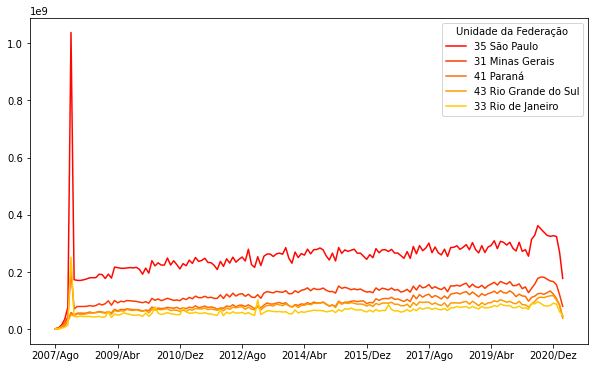

In [46]:
ordenado_por_total[:5].T.plot(figsize=(10, 6))

### Desafio 03: Deixar o gráfico mais bonito, a mensagem mais clara (título, legenda, escala)

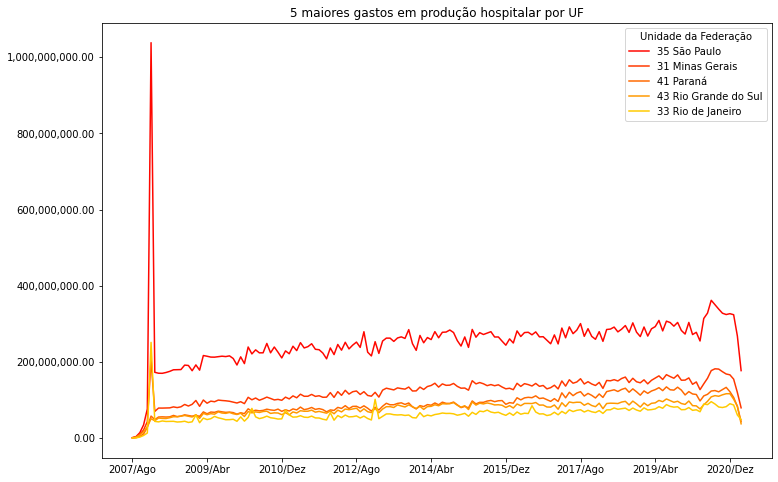

In [47]:
ax = ordenado_por_total[:5].T.plot(figsize=(12, 8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("5 maiores gastos em produção hospitalar por UF")

plt.show()

#as cores estão condizentes, é um gradiente do maior (cor mais intensa) para o menor (cor mais suave)

### Desafio 04: Adicione o seu estado aos 5 estados existentes e plote

In [48]:
estados_e_mt = ordenado_por_total[:5].index.to_list()
estados_e_mt.append("51 Mato Grosso")

estados_e_mt

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro',
 '51 Mato Grosso']

Criei uma nova lista usando como base o DF ordenado_por_total selecionando os cinco primeiros elementos e depois usei o método append de listas para adicionar o Mato Grosso

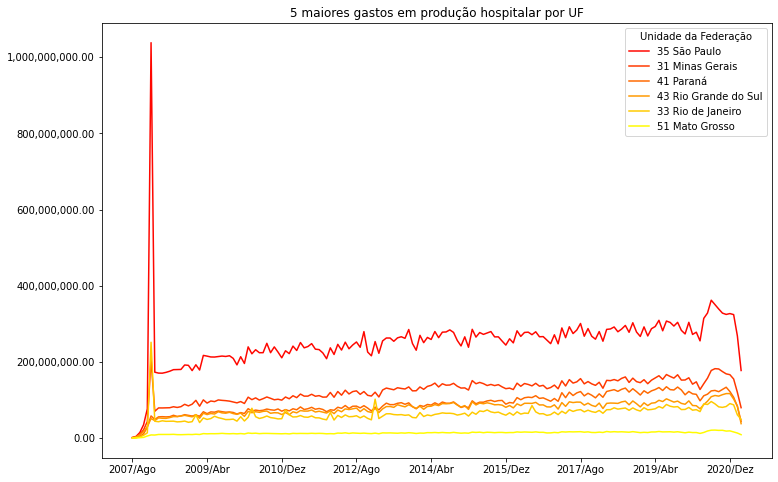

In [49]:
ax = ordenado_por_total.loc[estados_e_mt].T.plot(figsize=(12, 8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("5 maiores gastos em produção hospitalar por UF")

plt.show()

#as cores estão condizentes, é um gradiente do maior (cor mais intensa) para o menor (cor mais suave)

Para exibir os dados que foram selecionados na lista estados_e_mt, eu usei o método Loc

### Continuando Módulo 02 - Removendo colunas

Na base de dados do curso existia um valor muito discrepante que atrapalhava a análise inteira dos dados.
Foi necessário analisar a base olhando os valores para encontrar um valor que seria muito maior do que os outros (ex: valor de 76 milhões com um valor de 1 bilhão que depois volta para 172 milhões)

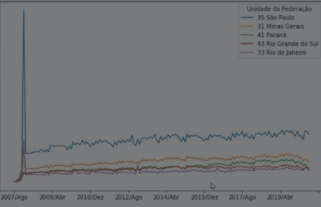

Depois que selecionamos o mês com o valor discrepante precisamos pesquisar para ver se aquele dado faz sentido (se naquele mês teve uma alta de gastos de 10x comparado com os meses anteriores e posteriores). Porém, no caso do exemplo, provavelmente, a base de dados se inicia em 2008 e os dados anteriores foram acumulados para janeiro de 2008.

No caso do exercício, nós poderíamos tratar esse dado discrepante de várias formas: fazer uma interpolação entre os valores do mês anterior e do mês posterior ou podemos apenas cortar o valor da nossa base de dados

No exercício do curso, os dados se iniciavam em 2007 e os instrutores optaram por selecionar da 6ªcoluna da base de dados para a frente. 

Para simular as operações realizadas vou fazer o mesmo trabalho eliminando a coluna de 2008/Jan (dado que os dados na data que importei não tinham esse problema, visto que, provavelmente, o fornecedor dos dados ajustou esse problema detectado)

In [50]:
colunas_interessadas = ordenado_por_total.columns[1:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

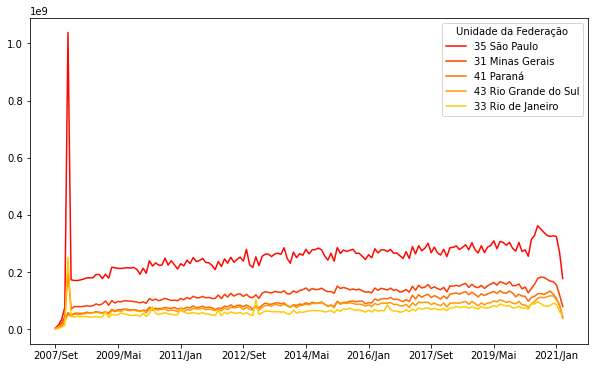

In [51]:
ordenado_por_total[:5].T.plot(figsize=(10, 6))

Observando nesse gráfico podemos verificar uma certa sazonalidade, onde sempre cresce, desce e depois cresce, desce. Isso é uma certa sazonalidade

Além de sazonalidade nós temos uma tendência, que é uma tendência crescente.

Outra análise é que em 2020 teve um crescimento nos gastos hospitalares, muito provavelmente relacionado à crise de Covid-19 que teve seu pico no segundo trimestre de 2020

### Desafio 05: Plotar só os estados do sudeste e ver se afetou com um pico em 2020 de forma similar esses estados

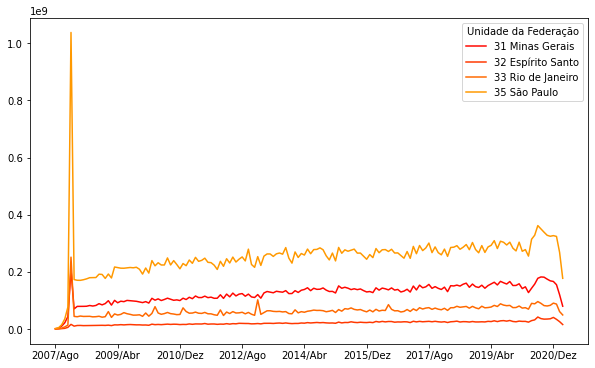

In [52]:
#estou usando a tabela usaveis porque já tem uma coluna das regiões
sudeste = usaveis[usaveis["Regiao"] == "Sudeste"]
sudeste.drop(["Regiao", "Total"], axis = 1).T.plot(figsize=(10, 6))

Eu criei um novo DataFrame que selecionou do DF usaveis apenas as linhas em que a coluna Região é igual a Sudeste e salvei esse novo DF como sudeste

Depois, para poder plotar esse DF sudeste, eu precisaria me livrar das colunas não numéricas e também da coluna de Total para não poluir o gráfico, para isso usei o método drop e plotei o gráfico normal

### Desafio 06: Adicionar seu estado escolhido novamente e deixe o gráfico informativo com suas informações claras

In [53]:
sudeste_mais_mt = sudeste.index.to_list()
sudeste_mais_mt.append("51 Mato Grosso")

Criei uma nova lista usando como base o DF sudeste que já tinha filtrado apenas os estados do sudeste e adicionei o Mato Grosso

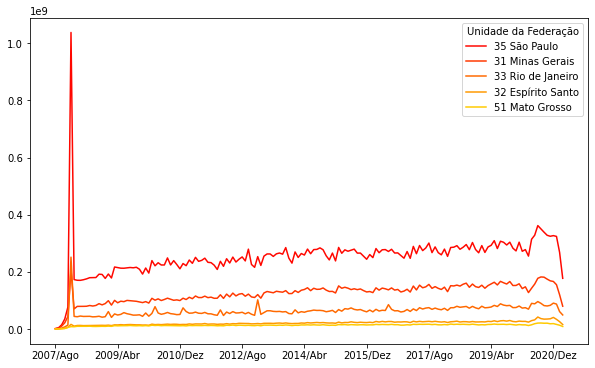

In [54]:
ax = usaveis.loc[sudeste_mais_mt].drop(["Regiao", "Total"], axis = 1).sort_values(by="2021/Mar", ascending=False).T.plot(figsize=(10, 6))

Para plotar os dados da lista sudeste_mais_mt no DF usaveis (precisaria ser esse DF pq o DF sudeste não tem o mato grosso) eu usei o método Loc. Porém, similar ao problema anterior, tive que dropar a coluna Região e Total

Para facilitar a leitura da legenda como temos três linhas muito claras em que uma é maior que a outra, poderíamos ordenar a legenda do maior para o menor tomando como base o valor de 2021/Mar. Para isso, eu usei o método sort values

## Aula 04.Análise de gráficos e criação de hipóteses

### Modulo 01 Fugindo de más práticas

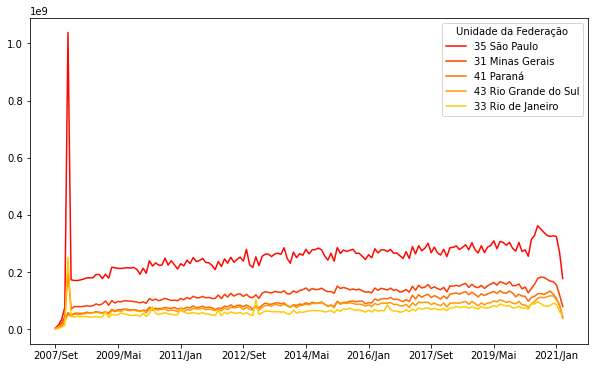

In [55]:
ordenado_por_total[:5].T.plot(figsize=(10, 6))

Observando o gráfico queremos pegar os dados e deixar os dados da direita em milhões, porque hoje está em dezenas de milhões. Para isso, podemos fazer o seguinte:

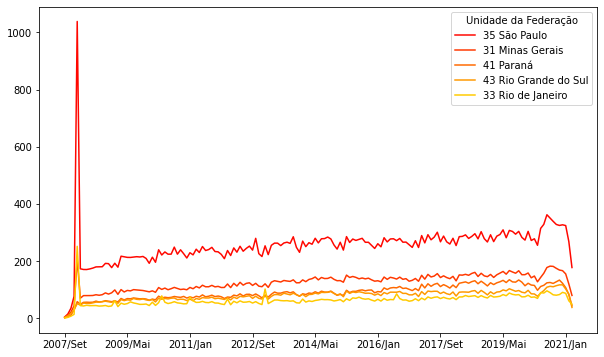

In [56]:
ordenado_por_total = (ordenado_por_total/1000000)
ordenado_por_total[:5].T.plot(figsize=(10, 6))

Agora nós queremos selecionar os dados apenas dos três primeiros estados em Jan 2012 até 2019. Nós podemos fazer um slice das colunas indicando esse período desejado

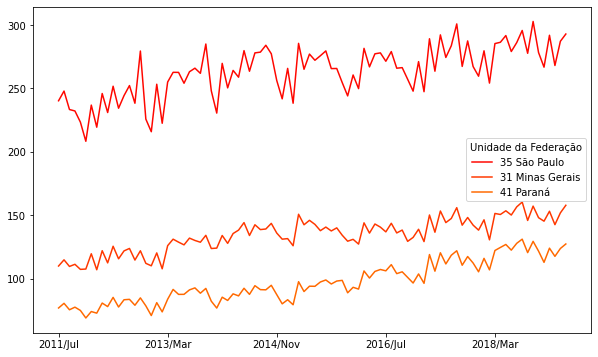

In [57]:
ordenado_por_total[ordenado_por_total.columns[46:140]][:3].T.plot(figsize=(10, 6))

Esse gráfico, parece que os gastos de São Paulo são muito maiores do que os gastos do Paraná. Porém, eles não são tão maiores. Essa ilusão ocorre porque o eixo não se inicia no valor 0. Observe o gráfico de cima comparado com o gráfico de baixo, que é exatamente o mesmo porém sem essa distorção. O valor de Paraná não parece mais tão menor do que o valor de São Paulo.

No primeiro gráfico parece que SP é 4x maior que PR, porque mostra quatro "ticks" do eixo, porém, olhando no gráfico de baixo, vemos que SP é apenas 2x (aproximadamente) maior que o PR.

(0.0, 350.0)

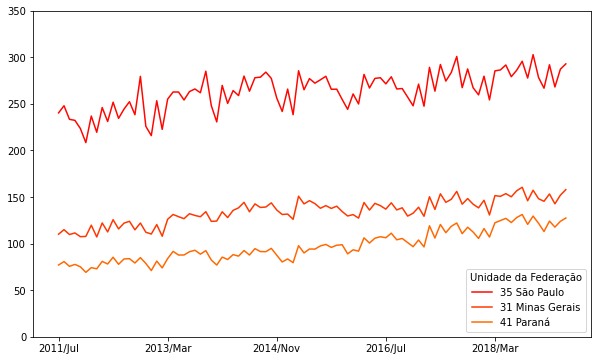

In [58]:
ordenado_por_total[ordenado_por_total.columns[46:140]][:3].T.plot(figsize=(10, 6))
plt.ylim(0, 350)
# essa função do plt determina o limite para o eixo Y, que deve começar no valor 0 e terminar no valor 350

Outro ponto de atenção é observar o eixo X, onde, em 12 meses, pode apresentar uma tendência de queda, mas, quando analisado os últimos 36 meses, obervamos uma tendência de alta (com uma pequena queda nos últimos 12 meses). Essa outra distorção ocorre também quando mudamos o tamanho da figura, como trocar de tamanho (10,6) para um tamanho quadrado (6,6)

## Aula 05.Manipulação e interpretação de gráficos

### Modulo 01 Alternativas de visualização

Queremos selecionar agora os dados do último mês.



In [59]:
mes_mais_recente = ordenado_por_total.columns[-1]

In [60]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente

Unidade da Federação
35 São Paulo             177.41
31 Minas Gerais           79.78
41 Paraná                 43.48
43 Rio Grande do Sul      37.80
33 Rio de Janeiro         49.15
29 Bahia                  31.31
26 Pernambuco             39.47
42 Santa Catarina         19.38
23 Ceará                  17.17
52 Goiás                  24.87
15 Pará                   13.07
21 Maranhão               17.29
32 Espírito Santo         15.61
24 Rio Grande do Norte     8.73
25 Paraíba                12.52
53 Distrito Federal       14.73
50 Mato Grosso do Sul      4.04
22 Piauí                   9.54
27 Alagoas                 8.18
51 Mato Grosso             8.84
13 Amazonas                6.80
28 Sergipe                 3.08
17 Tocantins               0.93
11 Rondônia                4.73
12 Acre                    1.14
14 Roraima                 2.38
16 Amapá                   0.99
Name: 2021/Mar, dtype: float64

### Existe um ditado: se um gráfico tem nome de comida, ele não deve ser utilizado.
-  O primeiro problema é que a legenda está inelegível
-  número de fatias muito grande
-  Não tem como saber se Rio Grande do SUl é maior que Paraná porque não existe uma legenda dos dados
-  Não dá para saber a ordem dos dados
-  Tem cores repetidas
-  Não dá para saber a proporção
-  É péssima para comparar grandezas (SP gastou 2 ou 3x mais que Paraná) - precisariamos compara áreas e perímetros

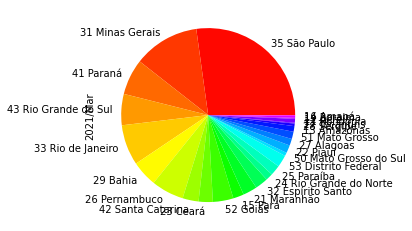

In [61]:
gastos_do_mais_recente.plot.pie()

In [62]:
#visualização mais simples para valores absolutos -> TABELA

gastos_do_mais_recente

Unidade da Federação
35 São Paulo             177.41
31 Minas Gerais           79.78
41 Paraná                 43.48
43 Rio Grande do Sul      37.80
33 Rio de Janeiro         49.15
29 Bahia                  31.31
26 Pernambuco             39.47
42 Santa Catarina         19.38
23 Ceará                  17.17
52 Goiás                  24.87
15 Pará                   13.07
21 Maranhão               17.29
32 Espírito Santo         15.61
24 Rio Grande do Norte     8.73
25 Paraíba                12.52
53 Distrito Federal       14.73
50 Mato Grosso do Sul      4.04
22 Piauí                   9.54
27 Alagoas                 8.18
51 Mato Grosso             8.84
13 Amazonas                6.80
28 Sergipe                 3.08
17 Tocantins               0.93
11 Rondônia                4.73
12 Acre                    1.14
14 Roraima                 2.38
16 Amapá                   0.99
Name: 2021/Mar, dtype: float64

Caso queiramos saber quantas vezes cada estado gastou quando comparado com Rio de Janeiro, poderíamos fazer a sintaxe

In [63]:
gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]

#dividindo um valor do estado pelo valor do Rio de Janeiro - ou seja, a linha do RJ vai dar 1.0

Unidade da Federação
35 São Paulo             3.61
31 Minas Gerais          1.62
41 Paraná                0.88
43 Rio Grande do Sul     0.77
33 Rio de Janeiro        1.00
29 Bahia                 0.64
26 Pernambuco            0.80
42 Santa Catarina        0.39
23 Ceará                 0.35
52 Goiás                 0.51
15 Pará                  0.27
21 Maranhão              0.35
32 Espírito Santo        0.32
24 Rio Grande do Norte   0.18
25 Paraíba               0.25
53 Distrito Federal      0.30
50 Mato Grosso do Sul    0.08
22 Piauí                 0.19
27 Alagoas               0.17
51 Mato Grosso           0.18
13 Amazonas              0.14
28 Sergipe               0.06
17 Tocantins             0.02
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.05
16 Amapá                 0.02
Name: 2021/Mar, dtype: float64

### Desafio 01 Criar a tabela de comparação com o seu estado

### Modulo 01 Alternativas de visualização

Conforme vimos anteriormente, a tabela criada é muito melhor que o gráfico de pizza para observar os valores. Porém, caso queiramos criar uma visualização gráfica para essa informação, podemos fazer um plot de barras

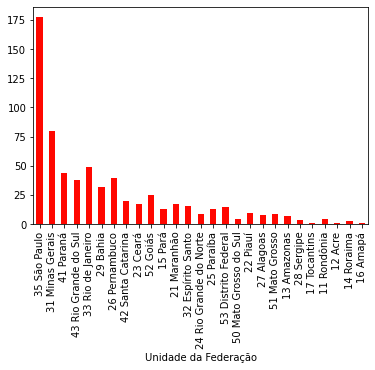

In [64]:
gastos_do_mais_recente.plot.bar()

Esse gráfico não está ordenado porque na tabela nós ordenamos do maior para o menor o valor total, não o último mês. Dessa forma, podemos usar o sort_values()

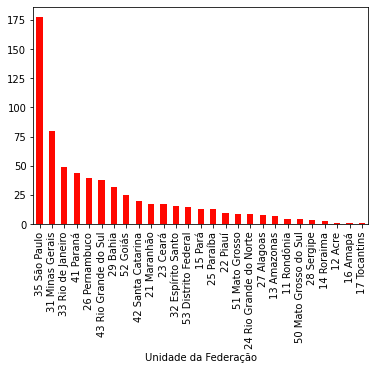

In [65]:
gastos_do_mais_recente.sort_values(ascending=False).plot.bar()

### Desafio 02 Plotar o gráfico de barra do gasto dos outros estados em comparação com o seu estado

### Desafio 03 Fazer o gasto por população do estado, escolher dois estados e plotar gráfico de barras

### Desafio 04 Explore e levante hipóteses com base nesses gráficos

### Super desafio: Escolha outro valor fora Valor Aprovado no TABNET e explore

# Módulo 2 - Visualização de dados com Seaborn e Matplotlib

### Aula 01.Fontes externas, limpeza e manutenção

#### Módulo 03: Usando fontes alternativas de dados

Ao fazer análises é importante verificar tanto os valores absolutos, como fizemos anteriormente, mas também é importante relativizar nossas análises (seja a proporção de gasto de cada estado do total ou os gastos per capta).

No exemplo abaixo vamos fazer os gastos proporcionais

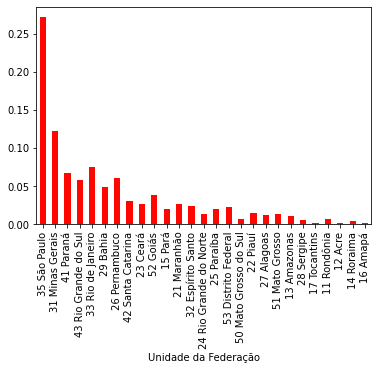

In [66]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind="bar")


Essa relatividade pode ser feita de várias formas. Um estado com maior parte da população com uma faixa etária mais elevada provavelmente teria um gasto superior à outros estados

Nós queremos observar agora o valores relativos de gastos com base na população de cada estado. Será que a população de SP é 27% da população do Brasil? Será que essa distribuição segue essa regra?

Agora vamos carregar a população do Brasil. Nós vamos usar a métrica de Estimativas da População do IBGE, baixados [desse link](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados) (Estimativas de população publicadas no DOU) em XLSX e salvos no GitHub do projeto

In [67]:
ibge_estimativa = pd.read_excel("https://github.com/nicolas-stelatto/bootcamp_data_science_aplicada/blob/main/Modulo_2/Dados/POP2020_20210331.xls?raw=true")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


Essa é uma forma que podemos pegar o arquivo de população. Uma outra forma de conseguir esses dados seria copiar uma tabela de uma página da web como o Wikipedia, por exemplo. Copiados [desse link](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o).

Lembrar de usar as triplas aspas para criar esse string

In [121]:
dados_da_população = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""
# essa string se comporta como um arquivo csv que é separado por tab

In [69]:
#pd.read_cev(dados_da_população, sep="\t")
# se tentarmos fazer dessa forma não irá funcionar, porque dados é uma string e não um caminho de um arquivo csv

O Read CSV suporta vários tipos de arquivos, seja um path de um arquivo ou um imput, um fluxo de entrada de dados, para isso podemos usar a biblioteca que transforma uma string em um fluxo de entrada e saída de dados

In [122]:
from io import StringIO

dados_da_população_io = StringIO(dados_da_população)

populacao = pd.read_csv(dados_da_população_io, sep="\t")
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


#### Desafio 01: ler esse arquivo direto do wikipedia (existe uma maneira simples de fazer isso e uma maneira mais complexa)

In [104]:
url_wiki = "https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"

match = "População" procura as tabelas com essa coluna

In [105]:
html = pd.read_html(url_wiki,match="População")
html

[    Posição  ...        País comparável (habitantes)
 0         1  ...                Espanha (46 439 864)
 1         2  ...              Sri Lanka (20 675 000)
 2         3  ...          Países Baixos (16 922 900)
 3         4  ...                  Chade (14 037 000)
 4         5  ...                Bolívia (11 410 651)
 5         6  ...                Bélgica (11 250 659)
 6         7  ...            Bielorrússia (9 485 300)
 7         8  ...  Emirados Árabes Unidos (9 157 000)
 8         9  ...                 Áustria (8 602 112)
 9        10  ...                  Sérvia (7 114 393)
 10       11  ...                Paraguai (7 003 406)
 11       12  ...                Paraguai (7 003 406)
 12       13  ...                  Líbano (4 168 000)
 13       14  ...                  Líbano (4 168 000)
 14       15  ...                  Líbano (4 168 000)
 15       16  ...                 Uruguai (3 415 866)
 16       17  ...                 Uruguai (3 415 866)
 17       18  ...           

Ele retorna dois data frames, nós queremos o primeiro

In [123]:
# O dataframe que queremos é o primeiro da lista de dataframes => [0]
wiki = html[0]
wiki.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


#### Desafio 03: Estuturar uma função para a limpeza e leitura dessa tabela, devolvendo a tabela populacao e a tabela unida conforme estamos fazendo manualmente abaixo

In [132]:
def ler_arquivo(texto):
  texto = StringIO(texto)
  df = pd.read_csv(texto, sep="\t")
  df = df.dropna()
  return df

# nós precisamos criar essa função para ler os arquivos. Não podemos juntar essa função com a função de baixo porque a de baixo necessita de uma parâmetro que é o df, que é o retorno da função acima

def tratar_arquivo(df):
  df["uf"] = df["Unidade federativa"]
  df["populacao"] = df["População"].str.replace(" ", "").astype(int)
  df = df[["populacao", "uf"]].set_index("uf")
  df.index = df.index.str.strip()
  for estado in gastos_do_mais_recente.index:
    df.index = df.index.str.replace(f"{estado} {estado}",estado)
  return df

def juntar(df1, df2):
  return df1.join(df2)

def criar_tabelas(tabela_copiada, df2):
  df = ler_arquivo(tabela_copiada)
  df = tratar_arquivo(df)
  unida = juntar(df, df2)
  return [df, unida]
#essa última é a função que vamos chamar. Essa função chama as três funcões criadas anteriormente e retorna apenas o que foi pedido no desafio: a tabela população e a tabela unida

In [133]:
populacao2, unida = criar_tabelas(dados_da_população, gastos_do_mais_recente)
# nesse caso chamamos a função [criar_tabela] atribuindo "tabela_copiada" para a variável "populacao2" usando como parâmetro a variável "dados_da_população" criada anteriormente
# e atribuimos df2 para a variável unida usando como parâmetro a variável criada anteriormente gastos_do_mais_recente
display(populacao2.head())
display(unida.head())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


,populacao,2021/Mar
uf,,
São Paulo,46289333,177.41
Minas Gerais,21292666,79.78
Rio de Janeiro,17366189,49.15
Bahia,14930634,31.31
Paraná,11516840,43.48


In [116]:
populacao2.index[0]

' São Paulo'

#### Módulo 04: Manipulação e junção de tabelas

In [71]:
populacao["populacao"] = populacao["População"]
populacao["uf"] = populacao["Unidade federativa"]
display(populacao.head())
display(populacao.info())

,Posição,Unidade federativa,População,% da pop. total,País comparável,populacao,uf
0,(habitantes),NaN,NaN,NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864),46 289 333,São Paulo
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000),21 292 666,Minas Gerais
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900),17 366 189,Rio de Janeiro
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000),14 930 634,Bahia Bahia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posição             28 non-null     object
 1   Unidade federativa  27 non-null     object
 2   População           27 non-null     object
 3   % da pop. total     27 non-null     object
 4   País comparável     27 non-null     object
 5   populacao           27 non-null     object
 6   uf                  27 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


None

A coluna populacao está como object porque a linha 0 está um NaN e porque os números tem os espaços e o pandas vai ser como string e não como number. Nós precisamos fazer os seguintes passos:
1.   Usar um dropna para sumir com os valores NaN
2.   Precisamos inicialmente usar um método nas strings de .replace para trocar os espaços por nenhum espaço, conforme a sintaxe abaixo e transformar no tipo de variável inteiro


In [72]:
#populacao["populacao"] = populacao["População"].replace(" ", "").astype(int)
# se tentarmos fazer dessa forma não vai funcionar porque o replace é uma função para string e não para series, para isso
# precisamos transformar em string usando o .str

populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
display(populacao.head())
display(populacao.info())

,Posição,Unidade federativa,População,% da pop. total,País comparável,populacao,uf
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864),46289333,São Paulo
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000),21292666,Minas Gerais
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900),17366189,Rio de Janeiro
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000),14930634,Bahia Bahia
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651),11516840,Paraná


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Posição             27 non-null     object
 1   Unidade federativa  27 non-null     object
 2   População           27 non-null     object
 3   % da pop. total     27 non-null     object
 4   País comparável     27 non-null     object
 5   populacao           27 non-null     int64 
 6   uf                  27 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.7+ KB


None

Agora vamos limpara a base removendo as colunas que não interessam e setando como indice a coluna uf

In [73]:
populacao = populacao[["populacao", "uf"]].set_index("uf")
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


Agora nós queremos, de alguma forma, cruzar os dados de populacao com os dados de gastos_do_mais_recente.

Gastos do Mais Recente é uma série e populacao é um dataframe. Os dois possuem um índice e podemos usar o indice para juntar os dois. Se usarmos a função join não vai funcionar, por dois motivos: o gastos_do_mais_recente é "35 São Paulo" e o populacao é "São Paulo"

Para resolver esse primeiro problema, podemos remover os três primeiros elementos de cada string da série gastos_do_mais_recente usando slice nas strings (precisa transformar em string)

In [74]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           177.41
Minas Gerais         79.78
Paraná               43.48
Rio Grande do Sul    37.80
Rio de Janeiro       49.15
Name: 2021/Mar, dtype: float64

O segundo problema para não funcionar é porque os indices não estão batendo. Para isso podemos usar o método loc ou mostrar o valor de uma posição do índice

In [75]:
populacao.index[0]

' São Paulo'

percebemos que existe um espaço antes do texto. Para isso podemos usar o método de operação de strings chamadio strip para remover os espaços

In [76]:
populacao.index[0].strip()

'São Paulo'

In [77]:
populacao.index = populacao.index.str.strip()
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


Agora podemos rodar o método join no dataframe populacao

In [78]:
populacao.join(gastos_do_mais_recente)

,populacao,2021/Mar
uf,,
São Paulo,46289333,177.41
Minas Gerais,21292666,79.78
Rio de Janeiro,17366189,49.15
Bahia Bahia,14930634,nan
Paraná,11516840,43.48
Rio Grande do Sul,11422973,37.80
Pernambuco,9616621,39.47
Ceará,9187103,17.17
Pará Pará,8690745,nan


Apareceram alguns erros como NaN porque está com o nome do estado duplicado, porque, quando nós copiamos a string da internet, provavelmente ele veio com o nome duplicado por causa do alt de alguma imagem.

Nesse caso nós podemos ir na string e ajustar manualmente, mas não é recomendado, porque, caso tenha uma atualização na página com aqueles dados, pode ser que o estado o Tocantins venha duplicado, então o nosso código iria quebrar. Vamos resolver o problema de forma automatizada com o código abaixo:

In [80]:
for estado in gastos_do_mais_recente.index:
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
  # nós vamos alterar a string de cada elemento do loop para, caso apareça duas vezes o estado ele fique apenas o estado "precisa colocar o "f" para interpolar"

populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [82]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente.head()

,populacao,2021/Mar
uf,,
São Paulo,46289333,177.41
Minas Gerais,21292666,79.78
Rio de Janeiro,17366189,49.15
Bahia,14930634,31.31
Paraná,11516840,43.48


#### Desafio 02: Reler o curso sobre Strings, relembrar os métodos e operações com strings

### Aula 02. Proporcionalidades e Seaborn

### Módulo 01: Visualização, Seaborn e Proporcionalidades